**Mohammad Nabizade Ardakani**/
conv - filters - saptial 

## imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow

## we use histogram function from previous exercise 

In [ ]:
def my_histogram(image, size):

	# We create an array of the required size that is filled with zeros
	myHisto = np.zeros(size)
	
	#loop around the image pixel by pixel
	for pixel in image:
		myHisto[pixel] += 1

	return (myHisto)

## Defining the convolution function with a selectable kernel for use in filtering

In [ ]:
def convolution1(image, kernel):


  pixels = []
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      pixels.append(image[i,j]);

  pixels = np.array(pixels).reshape(image.shape[0],image.shape[1]);

  pixels = np.insert(pixels , [0,image.shape[0]] , np.zeros(len(pixels[0])) , axis = 0);
  pixels = np.insert(pixels , [0,image.shape[1]] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1);

  convoluted_matrix = [];
  for i in range(1,image.shape[0]):
    for j in range(1,image.shape[1]):
     temp = pixels[i:i+3 , j:j+3]
     product = np.multiply(temp,kernel)
     convoluted_matrix.append(sum(sum(product)));

  convoluted_matrix = np.array(convoluted_matrix).reshape(image.shape[0]-1,image.shape[1]-1);

  return(convoluted_matrix)

## now we import our images

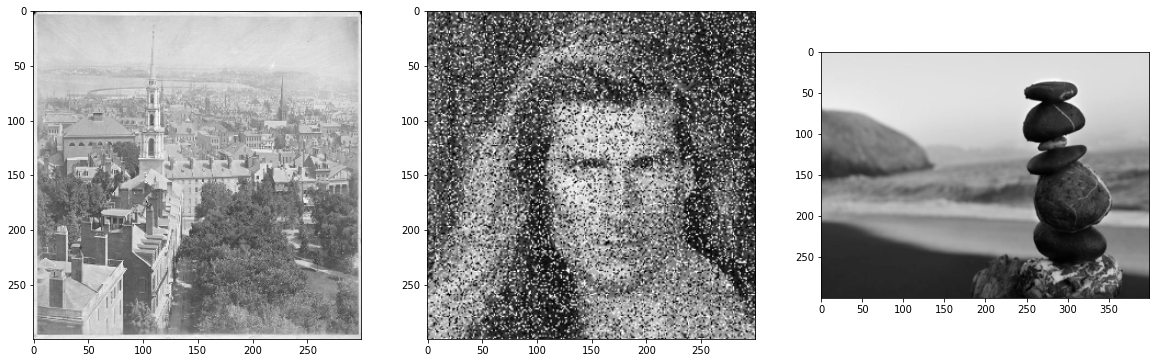

In [ ]:
img = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://arthive.net/res/media/img/orig/article/8ff/7567073.webp').read()), dtype=np.uint8), 0)
#img = cv2.resize(img, (300,300))


fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.add_subplot(1,1,1)
plt.imshow(img,'gray')



## now we define our kernels to be used as spatial filters

###smoothing filters One with weight and one without weight

In [ ]:
box_filter = np.array([[1, 1, 1], 
                   [1, 1, 1],
                   [1, 1, 1]]);

weighted_average = np.array([[1, 2, 1], 
                   [2, 4, 2],
                   [1, 2, 1]]);                   

### we convolve filter and image

In [ ]:
boximg = convolution1(img, box_filter);
boximg1 = convolution1(img1, box_filter);
boximg2 = convolution1(img2, box_filter);

weighted_averageimg = convolution1(img, weighted_average);
weighted_averageimg1 = convolution1(img1, weighted_average);
weighted_averageimg2 = convolution1(img2, weighted_average);

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

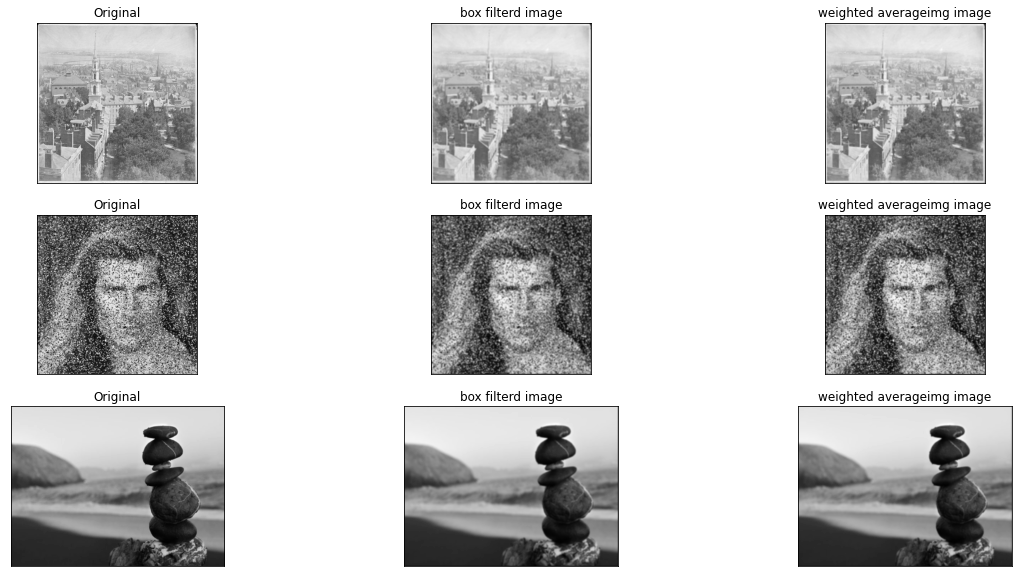

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplot(331),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(boximg,'gray'),plt.title('box filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(weighted_averageimg,'gray'),plt.title('weighted averageimg image')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(img1,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(boximg1,'gray'),plt.title('box filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6),plt.imshow(weighted_averageimg1,'gray'),plt.title('weighted averageimg image')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(img2,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(boximg2,'gray'),plt.title('box filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,9),plt.imshow(weighted_averageimg2,'gray'),plt.title('weighted averageimg image')
plt.xticks([]), plt.yticks([])



### shapening kernels

#### laplacian

In [ ]:
laplacianM = np.array([[0, 1, 0], 
                   [1, -4, 1],
                   [0, 1, 0]]);

laplacianP = np.array([[0, -1, 0], 
                   [-1, 4, -1],
                   [0, -1, 0]]);  

In [ ]:
laplacianm1 = convolution1(img, laplacianM);
laplacianm2 = convolution1(img1, laplacianM);
laplacianm3 = convolution1(img2, laplacianM);

laplacianp1 = convolution1(img, laplacianP);
laplacianp2 = convolution1(img1, laplacianP);
laplacianp3 = convolution1(img2, laplacianP);

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

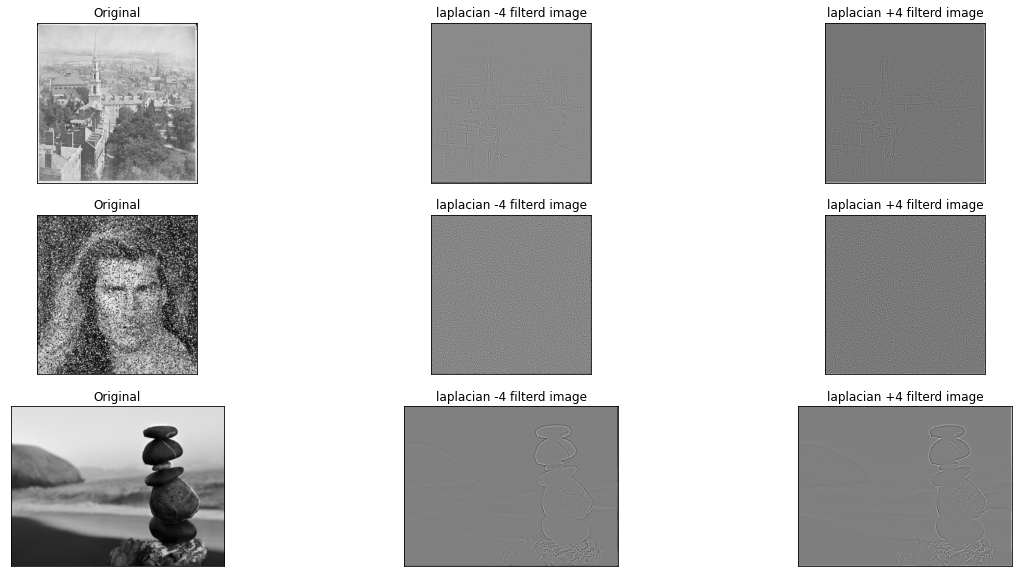

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplot(331),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(laplacianm1,'gray'),plt.title('laplacian -4 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(laplacianp1,'gray'),plt.title('laplacian +4 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(img1,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(laplacianm2,'gray'),plt.title('laplacian -4 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6),plt.imshow(laplacianp2,'gray'),plt.title('laplacian +4 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(img2,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(laplacianm3,'gray'),plt.title('laplacian -4 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,9),plt.imshow(laplacianp3,'gray'),plt.title('laplacian +4 filterd image')
plt.xticks([]), plt.yticks([])


In [ ]:
derivative2m = np.array([[1, 1, 1], 
                   [1, -8, 1],
                   [1, 1, 1]]);

derivative2p = np.array([[-1, -1, -1], 
                   [-1, 8, -1],
                   [-1, -1, -1]]);  

In [ ]:
derivative2m1 = convolution1(img, derivative2m);
derivative2m2 = convolution1(img1, derivative2m);
derivative2m3 = convolution1(img2, derivative2m);

derivative2p1 = convolution1(img, derivative2p);
derivative2p2 = convolution1(img1, derivative2p);
derivative2p3 = convolution1(img2, derivative2p);

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

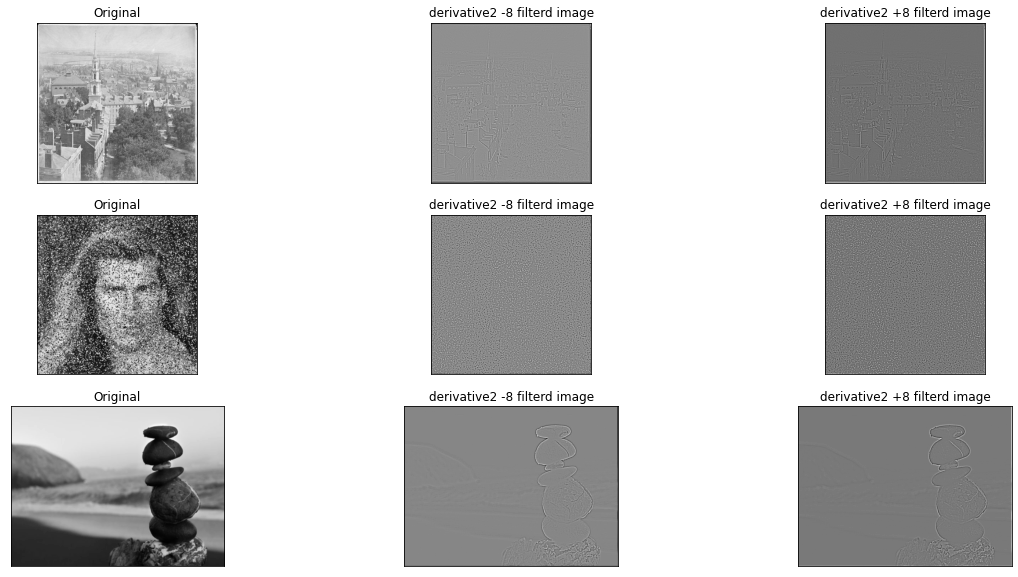

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplot(331),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(derivative2m1,'gray'),plt.title('derivative2 -8 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(derivative2p1,'gray'),plt.title('derivative2 +8 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(img1,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(derivative2m2,'gray'),plt.title('derivative2 -8 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6),plt.imshow(derivative2p2,'gray'),plt.title('derivative2 +8 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(img2,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(derivative2m3,'gray'),plt.title('derivative2 -8 filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,9),plt.imshow(derivative2p3,'gray'),plt.title('derivative2 +8 filterd image')
plt.xticks([]), plt.yticks([])

### sobel mask

In [ ]:
sobelx = np.array([[-1, -2, -1], 
                   [0, 0, 0],
                   [1, 2, 1]]);
                   
sobely = np.array([[-1, 0, 1], 
                   [-2, 0, 2],
                   [-1, 0, 1]]);

In [ ]:
sobelx1 = convolution1(img, sobelx);
sobelx2 = convolution1(img1, sobelx);
sobelx3 = convolution1(img2, sobelx);

sobely1 = convolution1(img, sobely);
sobely2 = convolution1(img1, sobely);
sobely3 = convolution1(img2, sobely);

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

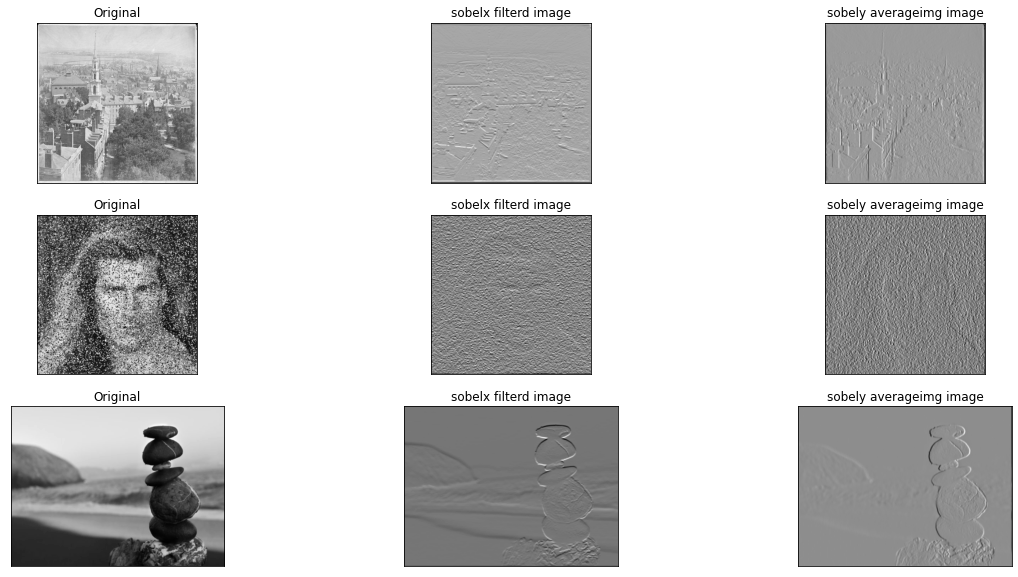

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplot(331),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(sobelx1,'gray'),plt.title('sobelx filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(sobely1,'gray'),plt.title('sobely averageimg image')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(img1,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(sobelx2,'gray'),plt.title('sobelx filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6),plt.imshow(sobely2,'gray'),plt.title('sobely averageimg image')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(img2,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(sobelx3,'gray'),plt.title('sobelx filterd image')
plt.xticks([]), plt.yticks([])
plt.subplot(3,3,9),plt.imshow(sobely3,'gray'),plt.title('sobely averageimg image')
plt.xticks([]), plt.yticks([])


## Defining the median filter with a selectable kernel size 

In [ ]:
def median_filter(image, kernel_size):
    temp = []
    indexer = kernel_size // 2 
    data_final = []
    x_temp = len(image)
    y_temp = len(image[0])
    data_final = np.zeros((x_temp,y_temp))

    for i in range(x_temp):
        for j in range(y_temp):
            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > x_temp - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > y_temp - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(image[i + z - indexer][j + k - indexer])
            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


In [ ]:
myimg = median_filter(img1, 7);

In [ ]:
myimg = np.reshape(myimg, img1.shape); myimg = myimg.astype("uint8");

<ipython-input-20-36db570c2ae3>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(222), plt.stem(my_histogram(img1, 256))
<ipython-input-20-36db570c2ae3>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(224), plt.stem(my_histogram(myimg, 256))


(0.0, 256.0)

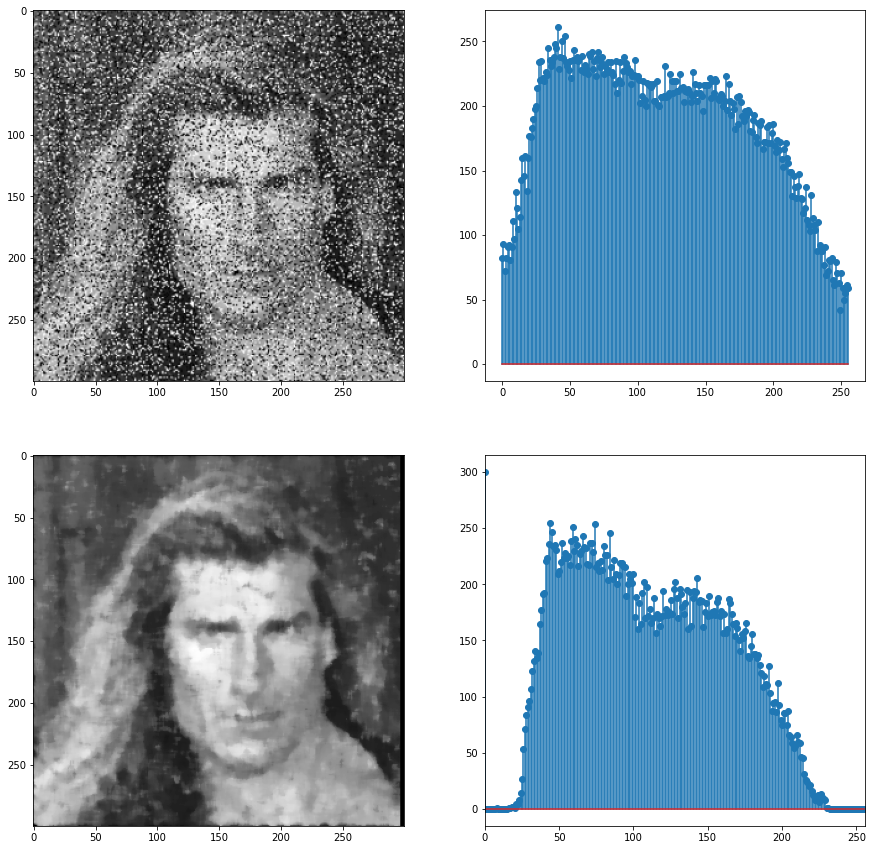

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(221), plt.imshow(img1,'gray')
plt.subplot(222), plt.stem(my_histogram(img1, 256))
plt.subplot(223), plt.imshow(myimg,'gray')
plt.subplot(224), plt.stem(my_histogram(myimg, 256))
plt.xlim([0,256])

🏁 Done 🏁